In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df_comp = pd.read_parquet("../../data/df_competitors.parquet")

In [24]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31799 entries, 0 to 39456
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   place       31799 non-null  object        
 1   product     31799 non-null  object        
 2   competitor  31799 non-null  object        
 3   price       31799 non-null  float64       
 4   date        31799 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(1), object(3)
memory usage: 1.5+ MB


In [25]:
cat_col = ["place", "product", "competitor"]
num_col = ["price"]
time_col = ["date"]

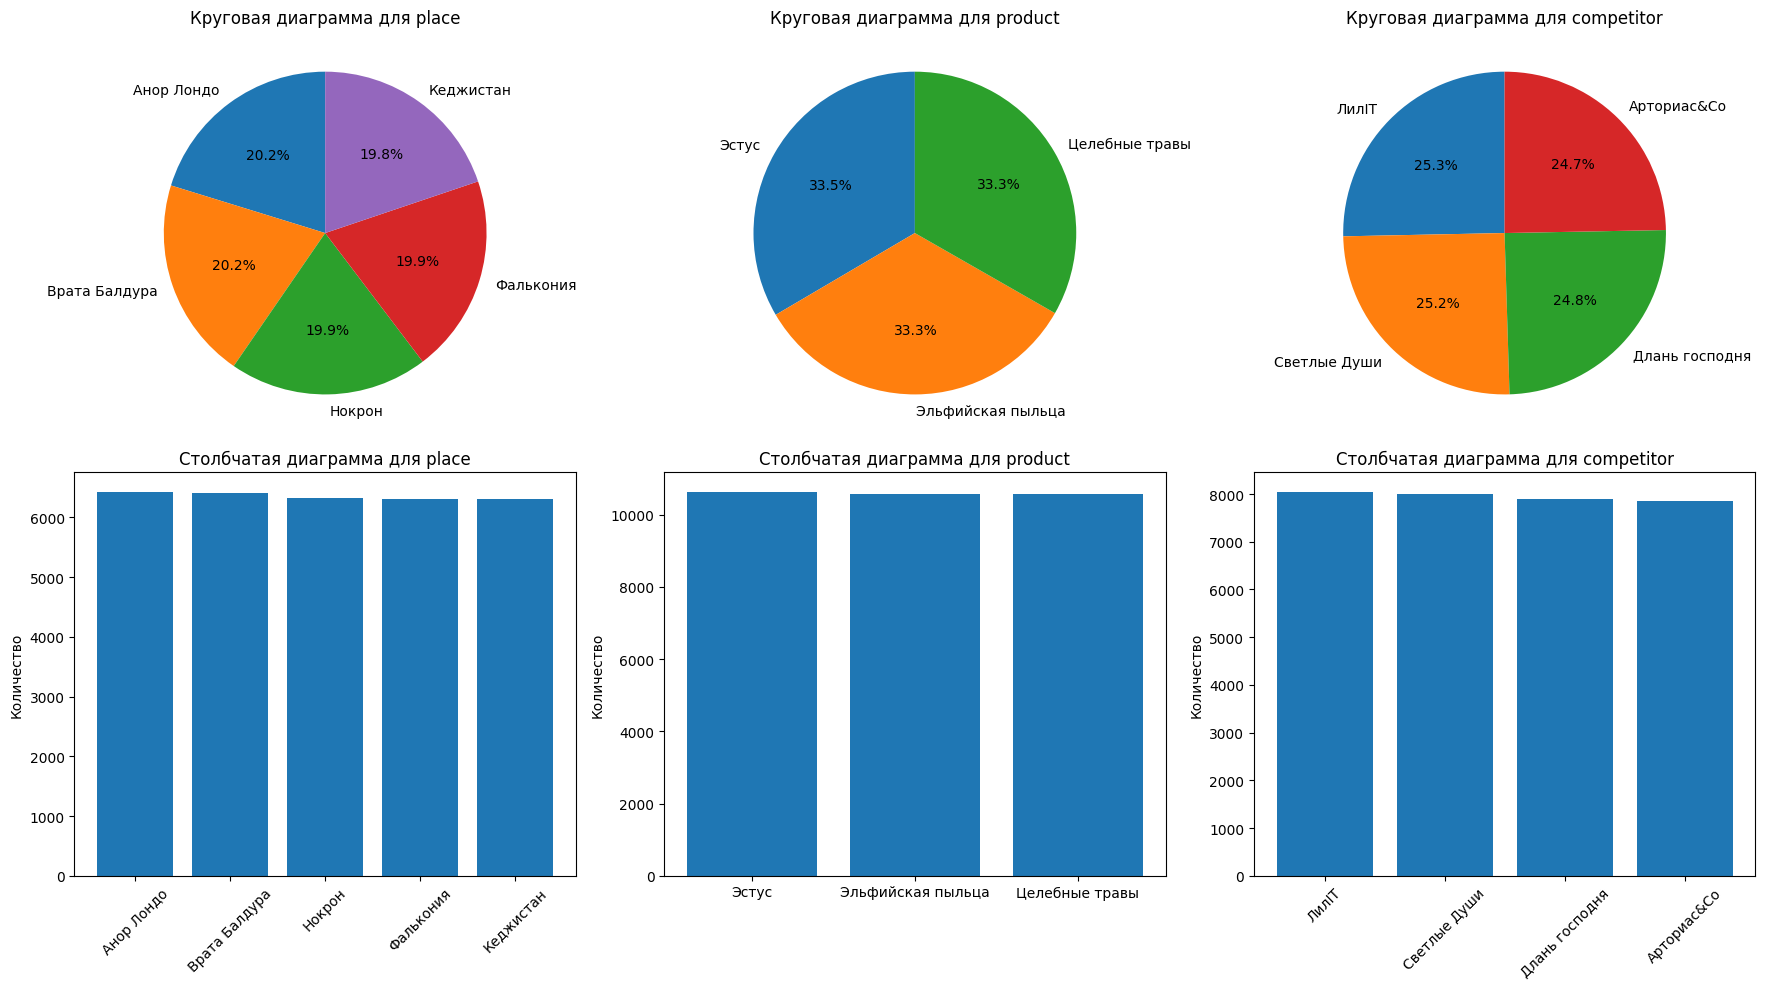

In [33]:
fig, axs = plt.subplots(2, len(cat_col), figsize=(6 * len(cat_col), 10))

for idx, col in enumerate(cat_col):
    value_counts = df_comp[col].value_counts()

    axs[0, idx].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axs[0, idx].set_title(f'Круговая диаграмма для {col}')

    axs[1, idx].bar(value_counts.index, value_counts.values)
    axs[1, idx].set_title(f'Столбчатая диаграмма для {col}')
    axs[1, idx].set_ylabel('Количество')

    if idx == 0 or idx == len(cat_col) - 1:
        axs[1, idx].set_xticks(range(len(value_counts.index)))
        axs[1, idx].set_xticklabels(value_counts.index, rotation=45)

plt.tight_layout()
plt.show()

В категориальных данных все ок + кол-во каждой категории практически равно

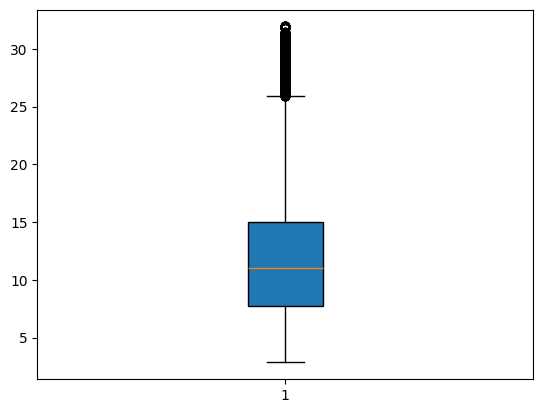

In [41]:
fig, ax = plt.subplots()
for col in num_col:
    plt.boxplot(df_comp[col], patch_artist=True)
    plt.show()

Тут тоже ок, выбросов не видно(цена в диапазоне от ~4 до ~33)

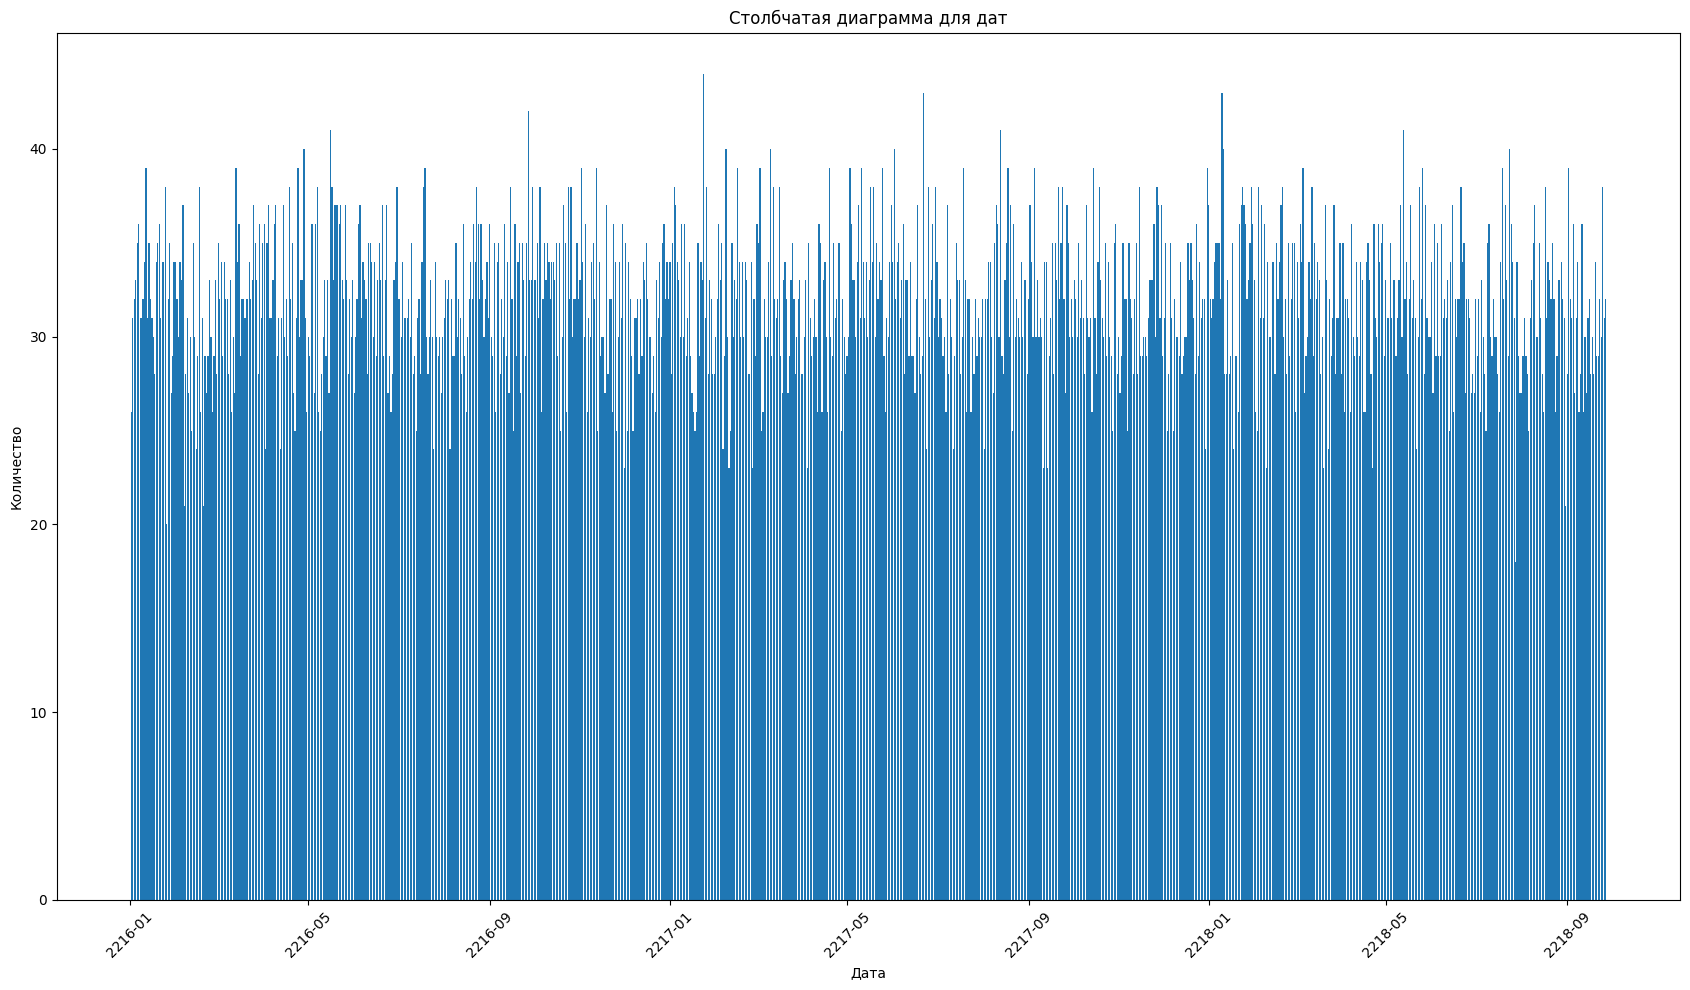

In [72]:
plt.figure(figsize=(17, 10))
value_counts = df_comp['date'].dt.normalize().value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)
plt.title(f'Столбчатая диаграмма для дат')
plt.ylabel('Количество')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Диапазон от 0 до 40, ок!